## 2)Merging datasets and EDA 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
#load both data sets
#the files are using semicolons as separators
data_rw = pd.read_csv('winequality-red.csv', sep=';')
data_ww = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
#Adding type column to distinguish between red and white wines
data_rw.insert(0, 'type', 'red')
data_ww.insert(0, 'type', 'white')

In [4]:
#Sanity check
data_rw.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [5]:
data_ww.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4893  white            6.2              0.21         0.29             1.6   
4894  white            6.6              0.32         0.36             8.0   
4895  white            6.5              0.24         0.19             1.2   
4896  white            5.5              0.29         0.30             1.1   
4897  white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4893      0.039                 24.0                  92.0  0.99114  3.27   
4894      0.047                 57.0                 168.0  0.99490  3.15   
4895      0.041                 30.0                 111.0  0.99254  2.99   
4896      0.022                 20.0                 110.0  0.98869  3.34   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
4893       0.50     11.2        6  
4894       0.46      9.6        5  
4895       0.46      9.4        6  
4896       0.38     12.8        7  
4897       0.32     11.8        6

In [6]:
#Merging both datasets
wines = data_rw.append(data_ww, ignore_index=True)

In [7]:
#Confirming datsets have merged
wines.shape

(6497, 13)

In [8]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


Since I'm interested in wine quality, I will separate the wines into categories based on their quality ratings.  This will be a new column called Quality Class.

* Low quality: <= 5
* Medium quality: 6-7
* High quality: > 7

In [9]:
wines['quality class'] = wines.quality.apply(lambda q: 'low' if q <= 5 \
                                             else 'high' if q > 7 else 'medium')

In [10]:
wines.shape

(6497, 14)

In [11]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality quality class  
0       0.56      9.4        5           low  
1       0.68      9.8        5           low  
2       0.65      9.8        5           low  
3       0.58      9.8        6        medium  
4       0.56      9.4        5           low

In [12]:
wines.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6492  white            6.2              0.21         0.29             1.6   
6493  white            6.6              0.32         0.36             8.0   
6494  white            6.5              0.24         0.19             1.2   
6495  white            5.5              0.29         0.30             1.1   
6496  white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6492      0.039                 24.0                  92.0  0.99114  3.27   
6493      0.047                 57.0                 168.0  0.99490  3.15   
6494      0.041                 30.0                 111.0  0.99254  2.99   
6495      0.022                 20.0                 110.0  0.98869  3.34   
6496      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality quality class  
6492       0.50     11.2        6        medium  
6493       0.46      9.6        5           low  
6494       0.46      9.4        6        medium  
6495       0.38     12.8        7        medium  
6496       0.32     11.8        6        medium

In [13]:
wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'quality class'],
      dtype='object')

In [14]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
quality class           6497 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [15]:
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [16]:
#looking at summary stats of each wine dataset
#Transposing data table and rounding decimal point to hundredths place
round(wines.loc[wines.type == 'red', wines.columns].describe(),2).T

count   mean    std   min    25%    50%    75%     max
fixed acidity         1599.0   8.32   1.74  4.60   7.10   7.90   9.20   15.90
volatile acidity      1599.0   0.53   0.18  0.12   0.39   0.52   0.64    1.58
citric acid           1599.0   0.27   0.19  0.00   0.09   0.26   0.42    1.00
residual sugar        1599.0   2.54   1.41  0.90   1.90   2.20   2.60   15.50
chlorides             1599.0   0.09   0.05  0.01   0.07   0.08   0.09    0.61
free sulfur dioxide   1599.0  15.87  10.46  1.00   7.00  14.00  21.00   72.00
total sulfur dioxide  1599.0  46.47  32.90  6.00  22.00  38.00  62.00  289.00
density               1599.0   1.00   0.00  0.99   1.00   1.00   1.00    1.00
pH                    1599.0   3.31   0.15  2.74   3.21   3.31   3.40    4.01
sulphates             1599.0   0.66   0.17  0.33   0.55   0.62   0.73    2.00
alcohol               1599.0  10.42   1.07  8.40   9.50  10.20  11.10   14.90
quality               1599.0   5.64   0.81  3.00   5.00   6.00   6.00    8.00

In [17]:
round(wines.loc[wines.type == 'white', wines.columns].describe(),2).T

count    mean    std   min     25%     50%     75%  \
fixed acidity         4898.0    6.85   0.84  3.80    6.30    6.80    7.30   
volatile acidity      4898.0    0.28   0.10  0.08    0.21    0.26    0.32   
citric acid           4898.0    0.33   0.12  0.00    0.27    0.32    0.39   
residual sugar        4898.0    6.39   5.07  0.60    1.70    5.20    9.90   
chlorides             4898.0    0.05   0.02  0.01    0.04    0.04    0.05   
free sulfur dioxide   4898.0   35.31  17.01  2.00   23.00   34.00   46.00   
total sulfur dioxide  4898.0  138.36  42.50  9.00  108.00  134.00  167.00   
density               4898.0    0.99   0.00  0.99    0.99    0.99    1.00   
pH                    4898.0    3.19   0.15  2.72    3.09    3.18    3.28   
sulphates             4898.0    0.49   0.11  0.22    0.41    0.47    0.55   
alcohol               4898.0   10.51   1.23  8.00    9.50   10.40   11.40   
quality               4898.0    5.88   0.89  3.00    5.00    6.00    6.00   

                         max  
fixed acidity          14.20  
volatile acidity        1.10  
citric acid             1.66  
residual sugar         65.80  
chlorides               0.35  
free sulfur dioxide   289.00  
total sulfur dioxide  440.00  
density                 1.04  
pH                      3.82  
sulphates               1.08  
alcohol                14.20  
quality                 9.00

In [18]:
#Descriptive dataframe stats for each type of wine
rws = round(wines.loc[wines.type == 'red', wines.columns].describe(),2).T
wws = round(wines.loc[wines.type == 'white', wines.columns].describe(),2).T

In [19]:
#Concatenating the two dataframes
pd.concat([rws, wws], axis=1, keys=['Red Wine', 'White Wine'])

Red Wine                                           \
                        count   mean    std   min    25%    50%    75%   
fixed acidity          1599.0   8.32   1.74  4.60   7.10   7.90   9.20   
volatile acidity       1599.0   0.53   0.18  0.12   0.39   0.52   0.64   
citric acid            1599.0   0.27   0.19  0.00   0.09   0.26   0.42   
residual sugar         1599.0   2.54   1.41  0.90   1.90   2.20   2.60   
chlorides              1599.0   0.09   0.05  0.01   0.07   0.08   0.09   
free sulfur dioxide    1599.0  15.87  10.46  1.00   7.00  14.00  21.00   
total sulfur dioxide   1599.0  46.47  32.90  6.00  22.00  38.00  62.00   
density                1599.0   1.00   0.00  0.99   1.00   1.00   1.00   
pH                     1599.0   3.31   0.15  2.74   3.21   3.31   3.40   
sulphates              1599.0   0.66   0.17  0.33   0.55   0.62   0.73   
alcohol                1599.0  10.42   1.07  8.40   9.50  10.20  11.10   
quality                1599.0   5.64   0.81  3.00   5.00   6.00   6.00   

                             White Wine                                       \
                         max      count    mean    std   min     25%     50%   
fixed acidity          15.90     4898.0    6.85   0.84  3.80    6.30    6.80   
volatile acidity        1.58     4898.0    0.28   0.10  0.08    0.21    0.26   
citric acid             1.00     4898.0    0.33   0.12  0.00    0.27    0.32   
residual sugar         15.50     4898.0    6.39   5.07  0.60    1.70    5.20   
chlorides               0.61     4898.0    0.05   0.02  0.01    0.04    0.04   
free sulfur dioxide    72.00     4898.0   35.31  17.01  2.00   23.00   34.00   
total sulfur dioxide  289.00     4898.0  138.36  42.50  9.00  108.00  134.00   
density                 1.00     4898.0    0.99   0.00  0.99    0.99    0.99   
pH                      4.01     4898.0    3.19   0.15  2.72    3.09    3.18   
sulphates               2.00     4898.0    0.49   0.11  0.22    0.41    0.47   
alcohol                14.90     4898.0   10.51   1.23  8.00    9.50   10.40   
quality                 8.00     4898.0    5.88   0.89  3.00    5.00    6.00   

                                      
                         75%     max  
fixed acidity           7.30   14.20  
volatile acidity        0.32    1.10  
citric acid             0.39    1.66  
residual sugar          9.90   65.80  
chlorides               0.05    0.35  
free sulfur dioxide    46.00  289.00  
total sulfur dioxide  167.00  440.00  
density                 1.00    1.04  
pH                      3.28    3.82  
sulphates               0.55    1.08  
alcohol                11.40   14.20  
quality                 6.00    9.00

The highlights from descriptive statistic of wine types:

* Mean total sulfur dioxide and residual sugar content seems to be much higher in white wines that in red wines
* Citric acid is more present in white wines, while fixed acidity, volatile acidity and sulphates are more present in red wine
* Red wines have double concentration of chlorides then white wines

### Now looking at wine quality

In [20]:
#Creating dataframe descriptive stats for each quality category
lqs = round(wines.loc[wines['quality class'] == 'low', wines.columns].describe(),2).T
mqs = round(wines.loc[wines['quality class'] == 'medium', wines.columns].describe(),2).T
hqs = round(wines.loc[wines['quality class'] == 'high', wines.columns].describe(),2).T

In [21]:
#Concatenating three dataframe categories
pd.concat([lqs, mqs, hqs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2384.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2384.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2384.0    0.30   0.16  0.00   0.21    0.30   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2384.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2384.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2384.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                     Medium Quality Wine           ...    \
                         75%     max               count    mean   ...     
fixed acidity           7.80   15.90              3915.0    7.16   ...     
volatile acidity        0.50    1.58              3915.0    0.31   ...     
citric acid             0.40    1.00              3915.0    0.33   ...     
residual sugar          8.52   23.50              3915.0    5.32   ...     
chlorides               0.08    0.61              3915.0    0.05   ...     
free sulfur dioxide    42.00  289.00              3915.0   30.96   ...     
total sulfur dioxide  167.00  440.00              3915.0  113.51   ...     
density                 1.00    1.00              3915.0    0.99   ...     
pH                      3.31    3.90              3915.0    3.22   ...     
sulphates               0.58    2.00              3915.0    0.54   ...     
alcohol                10.40   14.90              3915.0   10.81   ...     
quality                 5.00    5.00              3915.0    6.28   ...     

                                     High Quality Wine                        \
                         75%     max             count    mean    std    min   
fixed acidity           7.60   15.60             198.0    6.85   1.14   3.90   
volatile acidity        0.36    1.04             198.0    0.29   0.12   0.12   
citric acid             0.39    1.66             198.0    0.33   0.10   0.03   
residual sugar          7.90   65.80             198.0    5.35   4.16   0.80   
chlorides               0.06    0.42             198.0    0.04   0.02   0.01   
free sulfur dioxide    41.00  112.00             198.0   34.51  17.08   3.00   
total sulfur dioxide  150.00  294.00             198.0  117.48  41.69  12.00   
density                 1.00    1.04             198.0    0.99   0.00   0.99   
pH                      3.33    4.01             198.0    3.23   0.16   2.88   
sulphates               0.61    1.95             198.0    0.51   0.16   0.25   
alcohol                11.70   14.20             198.0   11.69   1.27   8.50   
quality                 7.00    7.00             198.0    8.03   0.16   8.00   

                                                     
                        25%     50%     75%     max  
fixed acidity          6.20    6.80    7.30   12.60  
volatile acidity       0.21    0.28    0.35    0.85  
citric acid            0.28    0.32    0.37    0.74  
residual sugar         2.00    4.05    7.57   14.80  
chlorides              0.03    0.04    0.04    0.12  
free sulfur dioxide   24.00   34.00   43.00  105.00  
total sulfur dioxide  96.00  118.50  145.00  212.50  
density                0.99    0.99    0.99    1.00  
pH                     3.13    3.23    3.33    3.72  
sulphates              0.38    0.48    0.60    1.10  
alcohol               11.00   12.00   12.60   14.00  
quality                8.00    8.00    8.00    9.00  


In [22]:
#Separating out each category for a clearer look at the data
lqs.describe()

count        mean        std        min        25%         50%  \
count    12.0   12.000000  12.000000  12.000000  12.000000   12.000000   
mean   2384.0   15.165000   7.484167   2.324167   9.137500   14.999167   
std       0.0   33.785114  18.036850   2.606623  19.035881   35.084286   
min    2384.0    0.060000   0.000000   0.000000   0.040000    0.050000   
25%    2384.0    0.490000   0.155000   0.212500   0.395000    0.460000   
50%    2384.0    4.045000   0.275000   1.495000   2.455000    3.050000   
75%    2384.0    7.965000   2.182500   3.300000   7.200000    7.725000   
max    2384.0  119.280000  61.890000   8.000000  68.000000  124.000000   

              75%         max  
count   12.000000   12.000000  
mean    20.549167   66.532500  
std     47.544315  143.044261  
min      0.080000    0.610000  
25%      0.560000    1.435000  
50%      4.155000    4.450000  
75%      8.990000   17.800000  
max    167.000000  440.000000

In [23]:
mqs.describe()

count        mean        std        min        25%         50%  \
count    12.0   12.000000  12.000000  12.000000  12.000000   12.000000   
mean   3915.0   14.956667   6.512500   2.493333  10.753333   14.752500   
std       0.0   32.201538  15.529469   2.897065  22.806658   32.899751   
min    3915.0    0.050000   0.000000   0.000000   0.040000    0.040000   
25%    3915.0    0.487500   0.137500   0.185000   0.387500    0.460000   
50%    3915.0    4.270000   0.305000   0.995000   2.455000    3.105000   
75%    3915.0    8.072500   2.152500   4.350000   7.250000    7.875000   
max    3915.0  113.510000  53.570000   8.400000  81.000000  116.000000   

              75%         max  
count   12.000000   12.000000  
mean    19.245833   43.226667  
std     42.698713   86.026466  
min      0.060000    0.420000  
25%      0.555000    1.505000  
50%      5.165000    5.505000  
75%      8.850000   28.150000  
max    150.000000  294.000000

In [24]:
hqs.describe()

count        mean        std        min        25%         50%  \
count   12.0   12.000000  12.000000  12.000000  12.000000   12.000000   
mean   198.0   15.775000   5.505000   3.373333  12.685000   15.724167   
std      0.0   33.432201  12.381959   4.021531  27.135308   33.728495   
min    198.0    0.040000   0.000000   0.010000   0.030000    0.040000   
25%    198.0    0.465000   0.115000   0.217500   0.355000    0.440000   
50%    198.0    4.290000   0.160000   1.935000   2.565000    3.640000   
75%    198.0    8.945000   1.992500   4.925000   8.750000    9.000000   
max    198.0  117.480000  41.690000  12.000000  96.000000  118.500000   

              75%         max  
count   12.000000   12.000000  
mean    19.095833   31.285833  
std     41.389760   64.036738  
min      0.040000    0.120000  
25%      0.542500    0.962500  
50%      5.315000    6.360000  
75%      9.150000   14.200000  
max    145.000000  212.500000

In [25]:
pd.concat([lqs, mqs, hqs], axis=1, keys=['Low Quality Winw', 'Medium Quality Wine', 'High Quality Wine']).T

fixed acidity  volatile acidity  citric acid  \
Low Quality Winw    count        2384.00           2384.00      2384.00   
                    mean            7.33              0.40         0.30   
                    std             1.27              0.19         0.16   
                    min             4.20              0.10         0.00   
                    25%             6.50              0.26         0.21   
                    50%             7.10              0.34         0.30   
                    75%             7.80              0.50         0.40   
                    max            15.90              1.58         1.00   
Medium Quality Wine count        3915.00           3915.00      3915.00   
                    mean            7.16              0.31         0.33   
                    std             1.31              0.14         0.13   
                    min             3.80              0.08         0.00   
                    25%             6.40              0.21         0.26   
                    50%             6.90              0.27         0.31   
                    75%             7.60              0.36         0.39   
                    max            15.60              1.04         1.66   
High Quality Wine   count         198.00            198.00       198.00   
                    mean            6.85              0.29         0.33   
                    std             1.14              0.12         0.10   
                    min             3.90              0.12         0.03   
                    25%             6.20              0.21         0.28   
                    50%             6.80              0.28         0.32   
                    75%             7.30              0.35         0.37   
                    max            12.60              0.85         0.74   

                           residual sugar  chlorides  free sulfur dioxide  \
Low Quality Winw    count         2384.00    2384.00              2384.00   
                    mean             5.65       0.06                29.48   
                    std              4.92       0.04                19.84   
                    min              0.60       0.01                 2.00   
                    25%              1.80       0.04                14.00   
                    50%              2.90       0.05                26.00   
                    75%              8.52       0.08                42.00   
                    max             23.50       0.61               289.00   
Medium Quality Wine count         3915.00    3915.00              3915.00   
                    mean             5.32       0.05                30.96   
                    std              4.68       0.03                16.33   
                    min              0.70       0.01                 1.00   
                    25%              1.80       0.04                19.00   
                    50%              3.00       0.04                29.00   
                    75%              7.90       0.06                41.00   
                    max             65.80       0.42               112.00   
High Quality Wine   count          198.00     198.00               198.00   
                    mean             5.35       0.04                34.51   
                    std              4.16       0.02                17.08   
                    min              0.80       0.01                 3.00   
                    25%              2.00       0.03                24.00   
                    50%              4.05       0.04                34.00   
                    75%              7.57       0.04                43.00   
                    max             14.80       0.12               105.00   

                           total sulfur dioxide  density       pH  sulphates  \
Low Quality Winw    count               2384.00  2384.00  2384.00    2384.00   
                    mean                 119.28     1.00     3.21

The highlights from descriptive statistics of wine quality classes:

* Alcohol concentration increases with quality of wines.
* Higher quality wines have less volatile acidity and the chlorides.
* Fixed acidity is lower with higher quality wines.
* The free sulfur dioxide is higher with high quality wines.

### EDA of Red and White wine quality vs. quality

(0, 2300)

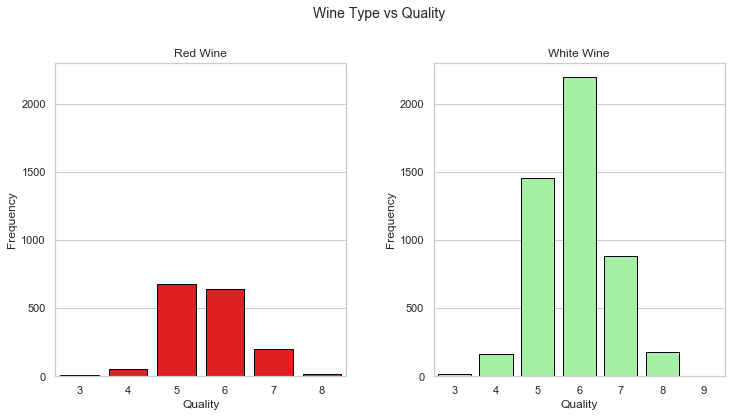

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
f.suptitle('Wine Type vs Quality', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.countplot(x='quality',
              data=wines[wines.type == 'red'],
              color='red',
              edgecolor='black',
              ax=ax1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality')
ax1.set_ylabel('Frequency',size=12)
ax1.set_ylim([0, 2300])

sns.countplot(x='quality',
              data=wines[wines.type == 'white'],
              color='palegreen',
              edgecolor='black',
              ax=ax2)
ax2.set_title('White Wine')
ax2.set_xlabel('Quality')
ax2.set_ylabel('Frequency') 
ax2.set_ylim([0, 2300])

Key takeaways:
* Both red and white wines are have a normal distribution
* Majority of red and white wines are rated 5 to 7
* Few red and white wines are rated either very good (8 – 9) or very poor (3 – 4)

(0, 3200)

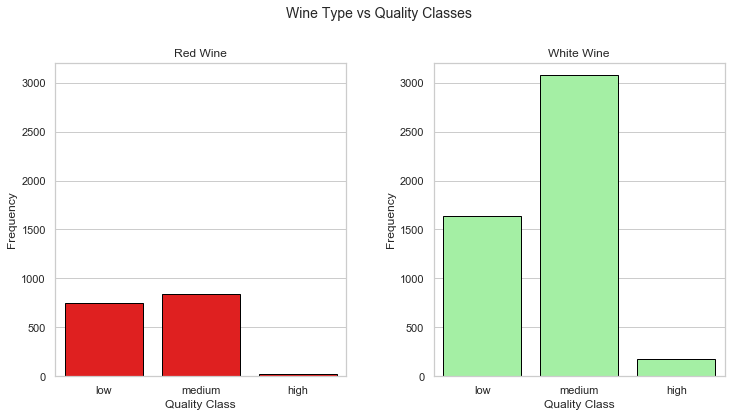

In [27]:
#Wine quality types vs. quality
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
f.suptitle('Wine Type vs Quality Classes', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.countplot(x='quality class',
              data=wines[wines.type == 'red'],
              color='red',
              order=['low','medium','high'],
              edgecolor='black',
              ax=ax1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality Class')
ax1.set_ylabel('Frequency',size=12)
ax1.set_ylim([0, 3200])

sns.countplot(x='quality class',
              data=wines[wines.type == 'white'],
              color='palegreen',
              order=['low','medium','high'],
              edgecolor='black',
              ax=ax2)
ax2.set_title('White Wine')
ax2.set_xlabel('Quality Class')
ax2.set_ylabel('Frequency',size=12) 
ax2.set_ylim([0, 3200])

Key takeaways:
* There is a definite imbalance between classes (More low to medium quality types and few high quality)

### Setting up dataframe for target variables

In [28]:
#Randomizing data points 
wines = wines.sample(frac=1, random_state=101).reset_index(drop=True)

In [29]:
#Creating a label encoder (to normalize labels)
le = LabelEncoder()

#Fit the encoder to dataframe column and return encoded labels (transferred to integers)
y_type = le.fit_transform(wines.type.values) # 0 - Red ; 1 - White

#Adding column "color" with normalized labels
#This will be used later for one of the research questions 
wines['color'] = y_type

In [30]:
type(y_type)

numpy.ndarray

In [31]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.56         0.22             1.8   
1  white            6.4              0.30         0.36             2.0   
2  white            5.9              0.17         0.29             3.1   
3  white            7.0              0.24         0.24             1.8   
4  white            6.4              0.45         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.074                 15.0                  24.0  0.99438  3.40   
1      0.052                 18.0                 141.0  0.99273  3.38   
2      0.030                 32.0                 123.0  0.98913  3.41   
3      0.047                 29.0                  91.0  0.99251  3.30   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol  quality quality class  color  
0       0.82     11.2        6        medium      0  
1       0.53     10.5        6        medium      1  
2       0.33     13.7        7        medium      1  
3       0.43      9.9        6        medium      1  
4       0.28     10.8        5           low      1

In [32]:
wines.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6492    red           12.7              0.59         0.45             2.3   
6493  white            8.0              0.25         0.35             1.1   
6494    red            8.3              0.85         0.14             2.5   
6495    red            6.3              0.60         0.10             1.6   
6496  white            7.1              0.18         0.49             1.3   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6492      0.082                 11.0                  22.0  1.00000  3.00   
6493      0.054                 13.0                 136.0  0.99366  3.08   
6494      0.093                 13.0                  54.0  0.99724  3.36   
6495      0.048                 12.0                  26.0  0.99306  3.55   
6496      0.033                 12.0                  72.0  0.99072  3.05   

      sulphates  alcohol  quality quality class  color  
6492       0.70      9.3        6        medium      0  
6493       0.55      9.5        5           low      1  
6494       0.54     10.1        5           low      0  
6495       0.51     12.1        5           low      0  
6496       0.53     11.3        7        medium      1

In [33]:
wines.color.unique()

array([0, 1], dtype=int64)

In [34]:
#Preparing target variable for the other research question 
qcl = {'low':0, 'medium': 1, 'high': 2}
y_qclass = wines['quality class'].map(qcl)

In [35]:
y_qclass.head()

0    1
1    1
2    1
3    1
4    0
Name: quality class, dtype: int64

In [36]:
type(y_qclass)

pandas.core.series.Series

In [37]:
y_qclass.unique()

array([1, 0, 2], dtype=int64)

In [38]:
#Heatmap/correlation
wcorr = wines.corr()
wines.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
color                     -0.486740         -0.653036     0.187397   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   
color                       0.348821  -0.512678             0.471644   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   
color                             0.700357 -0.390645 -0.329129  -0.487218   

                       alcohol   quality     color  
fixed acidity        -0.095452 -0.076743 -0.486740  
volatile acidity     -0.037640 -0.265699 -0.653036  
citric acid          -0.010493  0.085532  0.187397  
residual sugar       -0.359415 -0.036980  0.348821  
chlorides            -0.256916 -0.200666 -0.512678  
free sulfur dioxide  -0.179838  0.055463  0.471644  
total sulfur dioxide -0.265740 -0.041385  0.700357  
density              -0.686745 -0.305858 -0.390645  
pH                    0.121248  0.019506 -0.329129  
sulphates            -0.003029  0.038485 -0.487218  
alcohol               1.000000  0.444319  0.032970  
quality               0.444319  1.000000  0.119323  
color                 0.032970  0.119323  1.000000

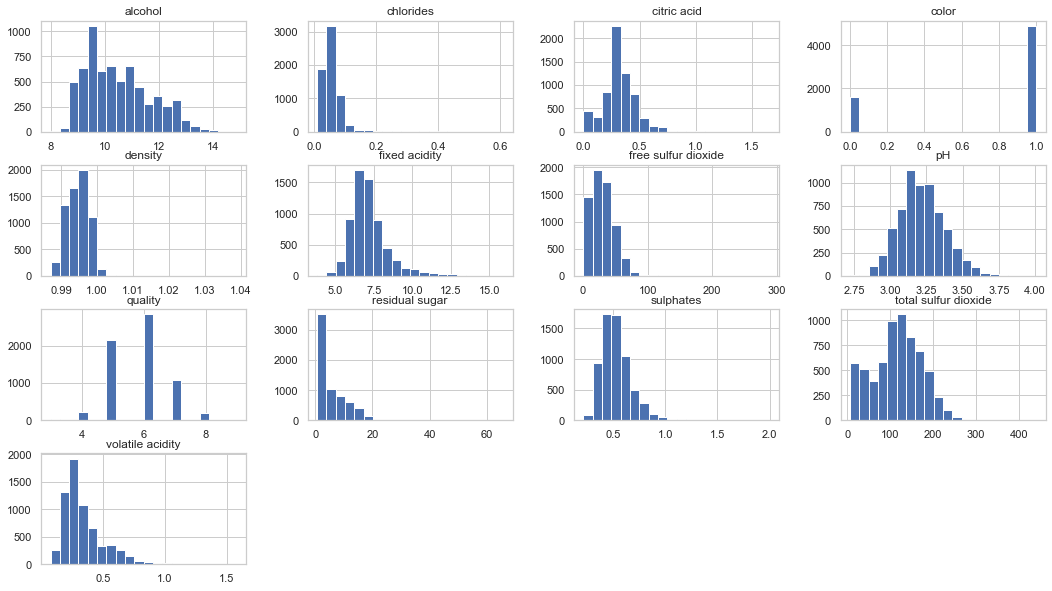

In [39]:
#Histogram of features
wines.hist(figsize=(18,10), bins=20);

In [40]:
wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'quality class', 'color'],
      dtype='object')

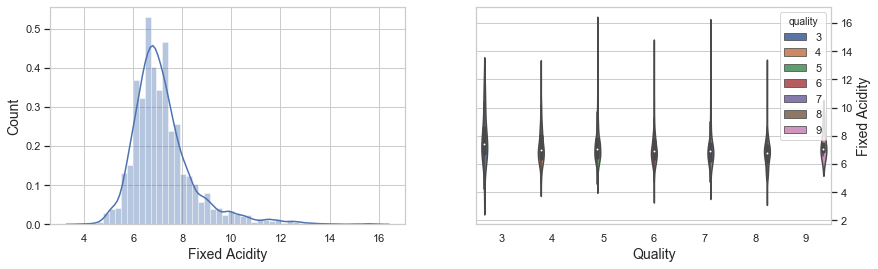

In [41]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['fixed acidity'], ax = axes[0])
axes[0].set_xlabel('Fixed Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'fixed acidity', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Fixed Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show();

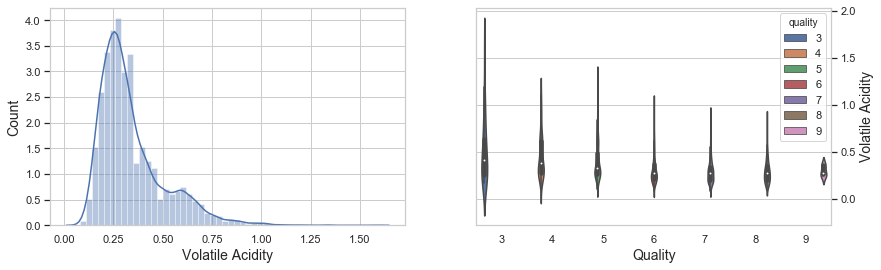

In [42]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['volatile acidity'], ax = axes[0])
axes[0].set_xlabel('Volatile Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'volatile acidity', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Volatile Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

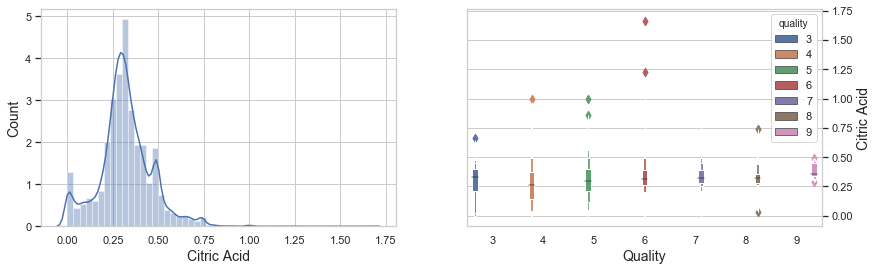

In [43]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['citric acid'], ax = axes[0])
axes[0].set_xlabel('Citric Acid', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'citric acid', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Citric Acid', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

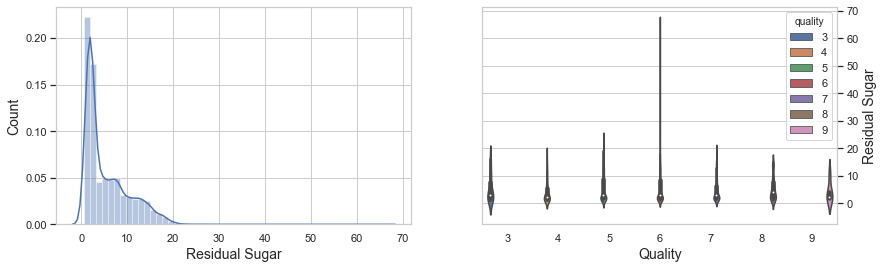

In [44]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['residual sugar'], ax = axes[0])
axes[0].set_xlabel('Residual Sugar', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'residual sugar', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Residual Sugar', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

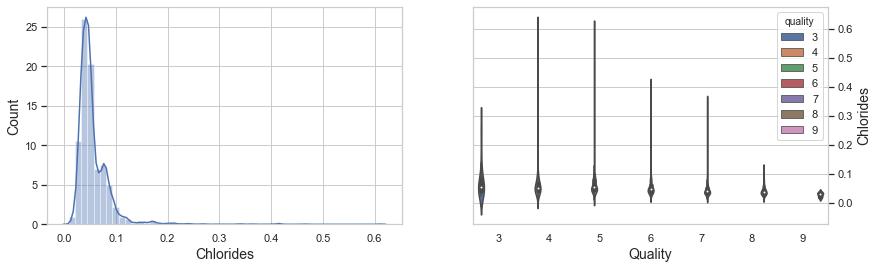

In [45]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['chlorides'], ax = axes[0])
axes[0].set_xlabel('Chlorides', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'chlorides', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Chlorides', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

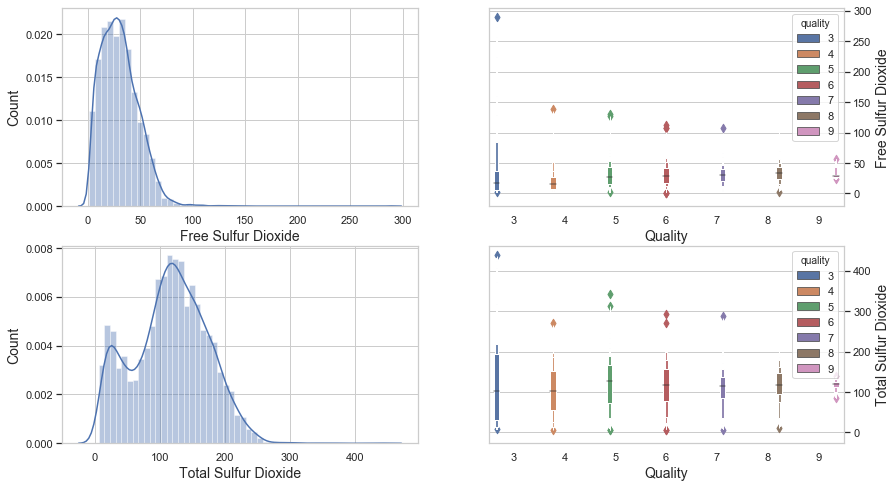

In [46]:
f, axes = plt.subplots(2,2,figsize=(14,8))

sns.distplot(wines['free sulfur dioxide'], ax = axes[0,0])
axes[0,0].set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes[0,0].set_ylabel('Count', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'free sulfur dioxide', data = wines, hue = 'quality',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=14)
axes[0,1].set_ylabel('Free Sulfur Dioxide', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.distplot(wines['total sulfur dioxide'], ax = axes[1,0])
axes[1,0].set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes[1,0].set_ylabel('Count', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'total sulfur dioxide', data = wines, hue = 'quality',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=14)
axes[1,1].set_ylabel('Total Sulfur Dioxide', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

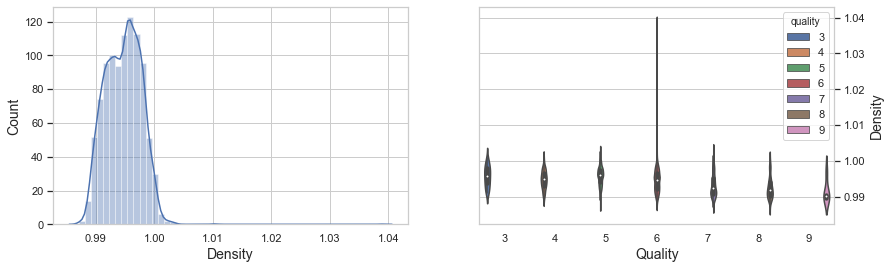

In [47]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['density'], ax = axes[0])
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'density', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

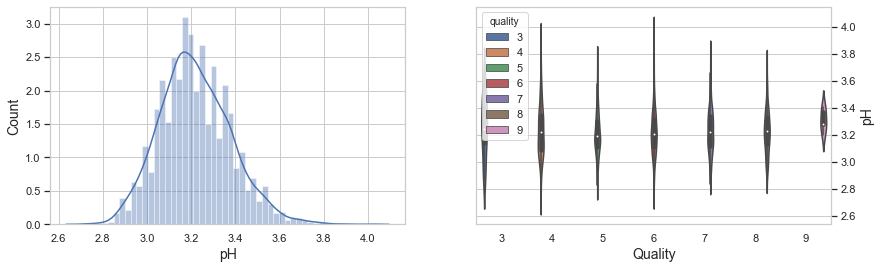

In [48]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()


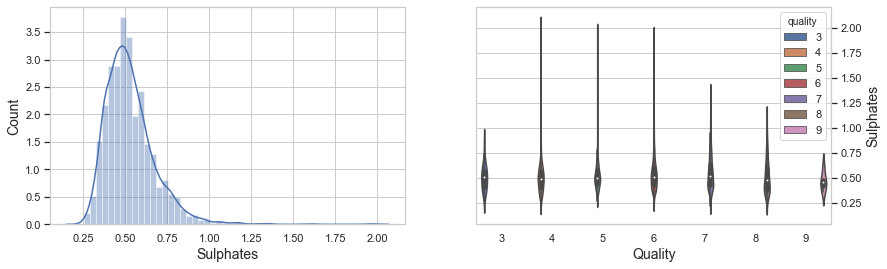

In [49]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['sulphates'], ax = axes[0])
axes[0].set_xlabel('Sulphates', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'sulphates', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Sulphates', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

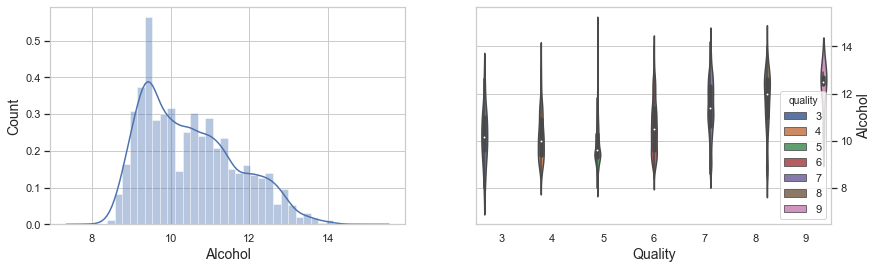

In [50]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(wines['alcohol'], ax = axes[0])
axes[0].set_xlabel('Alcohol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'alcohol', data = wines, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Alcohol', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

## Sort features based on type of wines (column "color")

In [51]:
#Sort features based on type of wines (column "color")
sort_corr_cols = wcorr.color.sort_values(ascending=False).keys()
sort_corr_t = wcorr.loc[sort_corr_cols,sort_corr_cols]
sort_corr_t

color  total sulfur dioxide  free sulfur dioxide  \
color                 1.000000              0.700357             0.471644   
total sulfur dioxide  0.700357              1.000000             0.720934   
free sulfur dioxide   0.471644              0.720934             1.000000   
residual sugar        0.348821              0.495482             0.402871   
citric acid           0.187397              0.195242             0.133126   
quality               0.119323             -0.041385             0.055463   
alcohol               0.032970             -0.265740            -0.179838   
pH                   -0.329129             -0.238413            -0.145854   
density              -0.390645              0.032395             0.025717   
fixed acidity        -0.486740             -0.329054            -0.282735   
sulphates            -0.487218             -0.275727            -0.188457   
chlorides            -0.512678             -0.279630            -0.195045   
volatile acidity     -0.653036             -0.414476            -0.352557   

                      residual sugar  citric acid   quality   alcohol  \
color                       0.348821     0.187397  0.119323  0.032970   
total sulfur dioxide        0.495482     0.195242 -0.041385 -0.265740   
free sulfur dioxide         0.402871     0.133126  0.055463 -0.179838   
residual sugar              1.000000     0.142451 -0.036980 -0.359415   
citric acid                 0.142451     1.000000  0.085532 -0.010493   
quality                    -0.036980     0.085532  1.000000  0.444319   
alcohol                    -0.359415    -0.010493  0.444319  1.000000   
pH                         -0.267320    -0.329808  0.019506  0.121248   
density                     0.552517     0.096154 -0.305858 -0.686745   
fixed acidity              -0.111981     0.324436 -0.076743 -0.095452   
sulphates                  -0.185927     0.056197  0.038485 -0.003029   
chlorides                  -0.128940     0.038998 -0.200666 -0.256916   
volatile acidity           -0.196011    -0.377981 -0.265699 -0.037640   

                            pH   density  fixed acidity  sulphates  chlorides  \
color                -0.329129 -0.390645      -0.486740  -0.487218  -0.512678   
total sulfur dioxide -0.238413  0.032395      -0.329054  -0.275727  -0.279630   
free sulfur dioxide  -0.145854  0.025717      -0.282735  -0.188457  -0.195045   
residual sugar       -0.267320  0.552517      -0.111981  -0.185927  -0.128940   
citric acid          -0.329808  0.096154       0.324436   0.056197   0.038998   
quality               0.019506 -0.305858      -0.076743   0.038485  -0.200666   
alcohol               0.121248 -0.686745      -0.095452  -0.003029  -0.256916   
pH                    1.000000  0.011686      -0.252700   0.192123   0.044708   
density               0.011686  1.000000       0.458910   0.259478   0.362615   
fixed acidity        -0.252700  0.458910       1.000000   0.299568   0.298195   
sulphates             0.192123  0.259478       0.299568   1.000000   0.395593   
chlorides             0.044708  0.362615       0.298195   0.395593   1.000000   
volatile acidity      0.261454  0.271296       0.219008   0.225984   0.377124   

                      volatile acidity  
color                        -0.653036  
total sulfur dioxide         -0.414476  
free sulfur dioxide          -0.352557  
residual sugar               -0.196011  
citric acid                  -0.377981  
quality                      -0.265699  
alcohol                      -0.037640  
pH                            0.261454  
density                       0.271296  
fixed acidity                 0.219008  
sulphates                     0.225984  
chlorides                     0.377124  
volatile acidity              1.000000

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text yticklabel objects>)

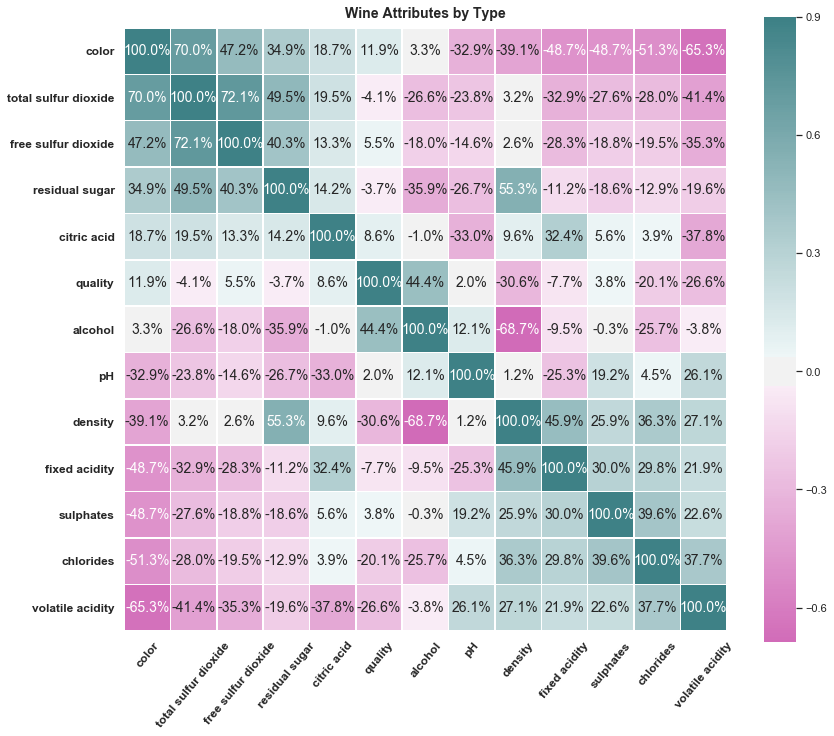

In [52]:
# heatmap plot for correlations
plt.figure(figsize=(13.5,11.5))
mask = np.zeros_like(sort_corr_t, dtype=np.bool)
cmap = sns.diverging_palette(325, 200, as_cmap=True)

sns.heatmap(sort_corr_t,
            annot=True,
            annot_kws=dict(fontsize=14),
            square=True,
            fmt='.1%',
            mask=mask, 
            cmap=cmap, 
            vmax=.9, 
            center=0,
            linewidths=.5)
plt.title('Wine Attributes by Type',
          fontsize=14,
          fontweight='bold',
          pad=10)
plt.xticks(rotation=50,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

Text(0.5, 0.98, 'Wine Attributes by Wine Types')

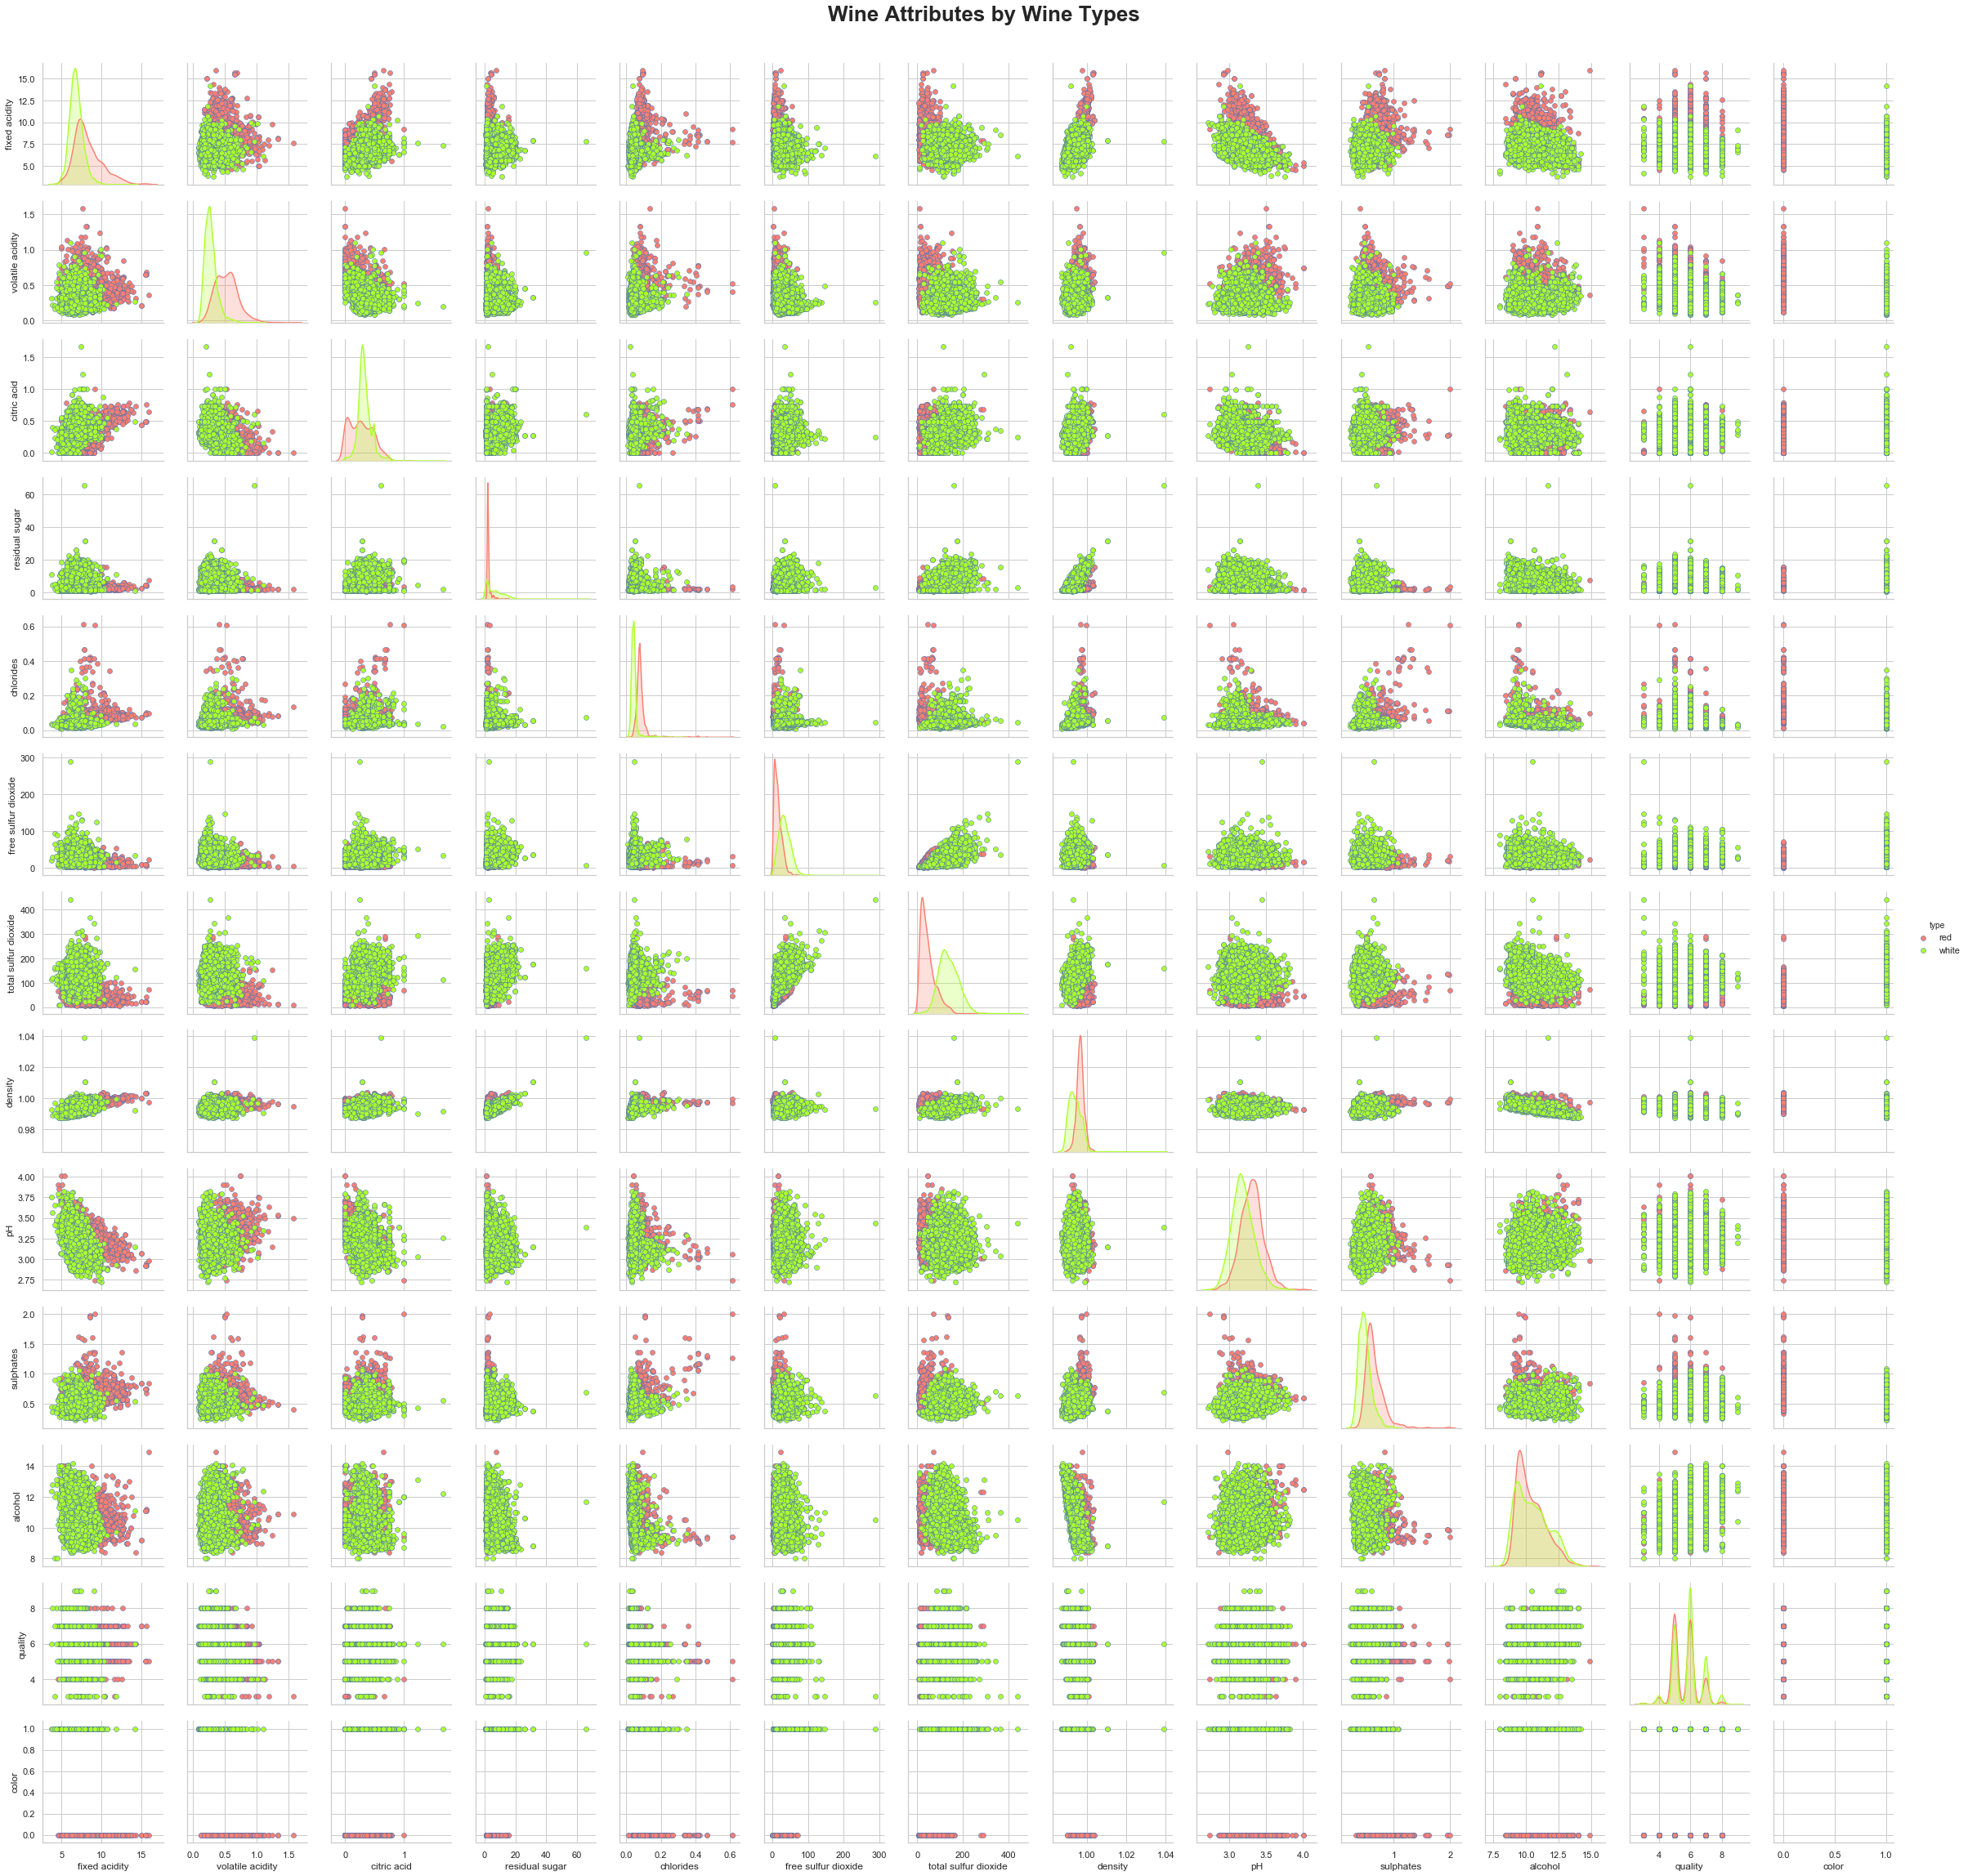

In [53]:
#Pairplot of wine features
g = sns.pairplot(wines,
                 hue='type',
                 palette={'red' : 'salmon', 'white' : 'greenyellow'},
                 plot_kws=dict(edgecolor='b', linewidth=0.5))

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Wine Attributes by Wine Types',
             fontsize=26,
             fontweight='bold')


Most of correlations are week but there are some exceptions.

Total (0.70) and free (0.47)sulfur dioxides have the highest correlation with white wines.
Free sulfur dioxide is a part of total sulfur dioxide and thus they have the highest correlation (0.72). That represents a colinearity that could be a problem for some models and free sulfur dioxide might need to be dropped later.
The volatile acid (-0.65) and chlorides (-0.51) have negative correlation with color. This indicates a tendency to red wines classification.
The residual sugar has 0.50 relation with total sulfur dioxide and 0.40 with free sulfur dioxide. This is an indication that more sulfur dioxide is added to wines with higher sugar content to prevent secondary fermentation of remaining sugar.
Density has a relatively high negative corelation to alcohol (-0.69). This is confirmed by the decreasing linear trend from left to right. Density has also relatively high positive correlation to residual sugar (0.55), which is reinforced by two white wine outliners.
Sulphates, chlorides, fixed acidity and volatile acidity in red wine seem to be higher than in white wine.
Residual sugar, total sulfur dioxide and citric acid seem to be higher in white wines as compared to red wine.

In [54]:
#Examing correlation and pairplots based off of wine quality.
#Sorting features (column "quality")
sort_corr_cols = wcorr.quality.sort_values(ascending=False).keys()
sort_corr_q = wcorr.loc[sort_corr_cols,sort_corr_cols]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text yticklabel objects>)

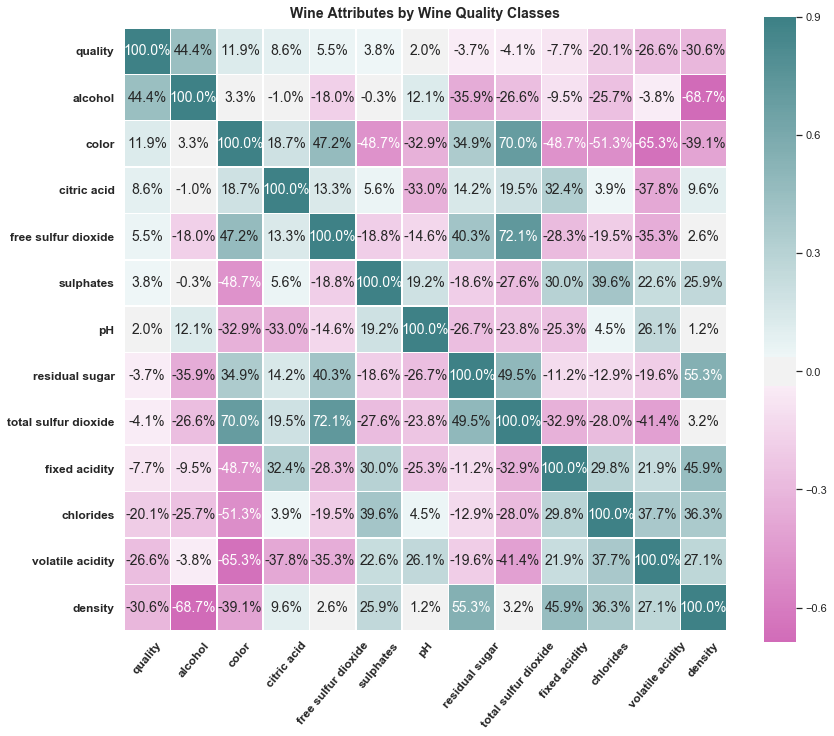

In [55]:
# heatmaps plot for correlations
plt.figure(figsize=(13.5,11.5))
mask = np.zeros_like(sort_corr_q, dtype=np.bool)
cmap = sns.diverging_palette(325, 200, as_cmap=True)

sns.heatmap(sort_corr_q,
            annot=True,
            annot_kws=dict(fontsize=14),
            square=True,
            fmt='.1%',
            mask=mask, 
            cmap=cmap, 
            vmax=.9, 
            center=0,
            linewidths=.5)
plt.title('Wine Attributes by Wine Quality Classes',
          fontsize=14,
          fontweight='bold',
          pad=10)

plt.xticks(rotation=50,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

In [56]:
#Drop quality column and add previously defined y_qclass for easier plotting
wines_pq = wines.drop('quality', axis=1)
wines_pq['q_class'] = y_qclass

In [57]:
wines_pq.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.56         0.22             1.8   
1  white            6.4              0.30         0.36             2.0   
2  white            5.9              0.17         0.29             3.1   
3  white            7.0              0.24         0.24             1.8   
4  white            6.4              0.45         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.074                 15.0                  24.0  0.99438  3.40   
1      0.052                 18.0                 141.0  0.99273  3.38   
2      0.030                 32.0                 123.0  0.98913  3.41   
3      0.047                 29.0                  91.0  0.99251  3.30   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol quality class  color  q_class  
0       0.82     11.2        medium      0        1  
1       0.53     10.5        medium      1        1  
2       0.33     13.7        medium      1        1  
3       0.43      9.9        medium      1        1  
4       0.28     10.8           low      1        0

Text(0.5, 0.98, 'Wine Attributes by Wine Quality Classes')

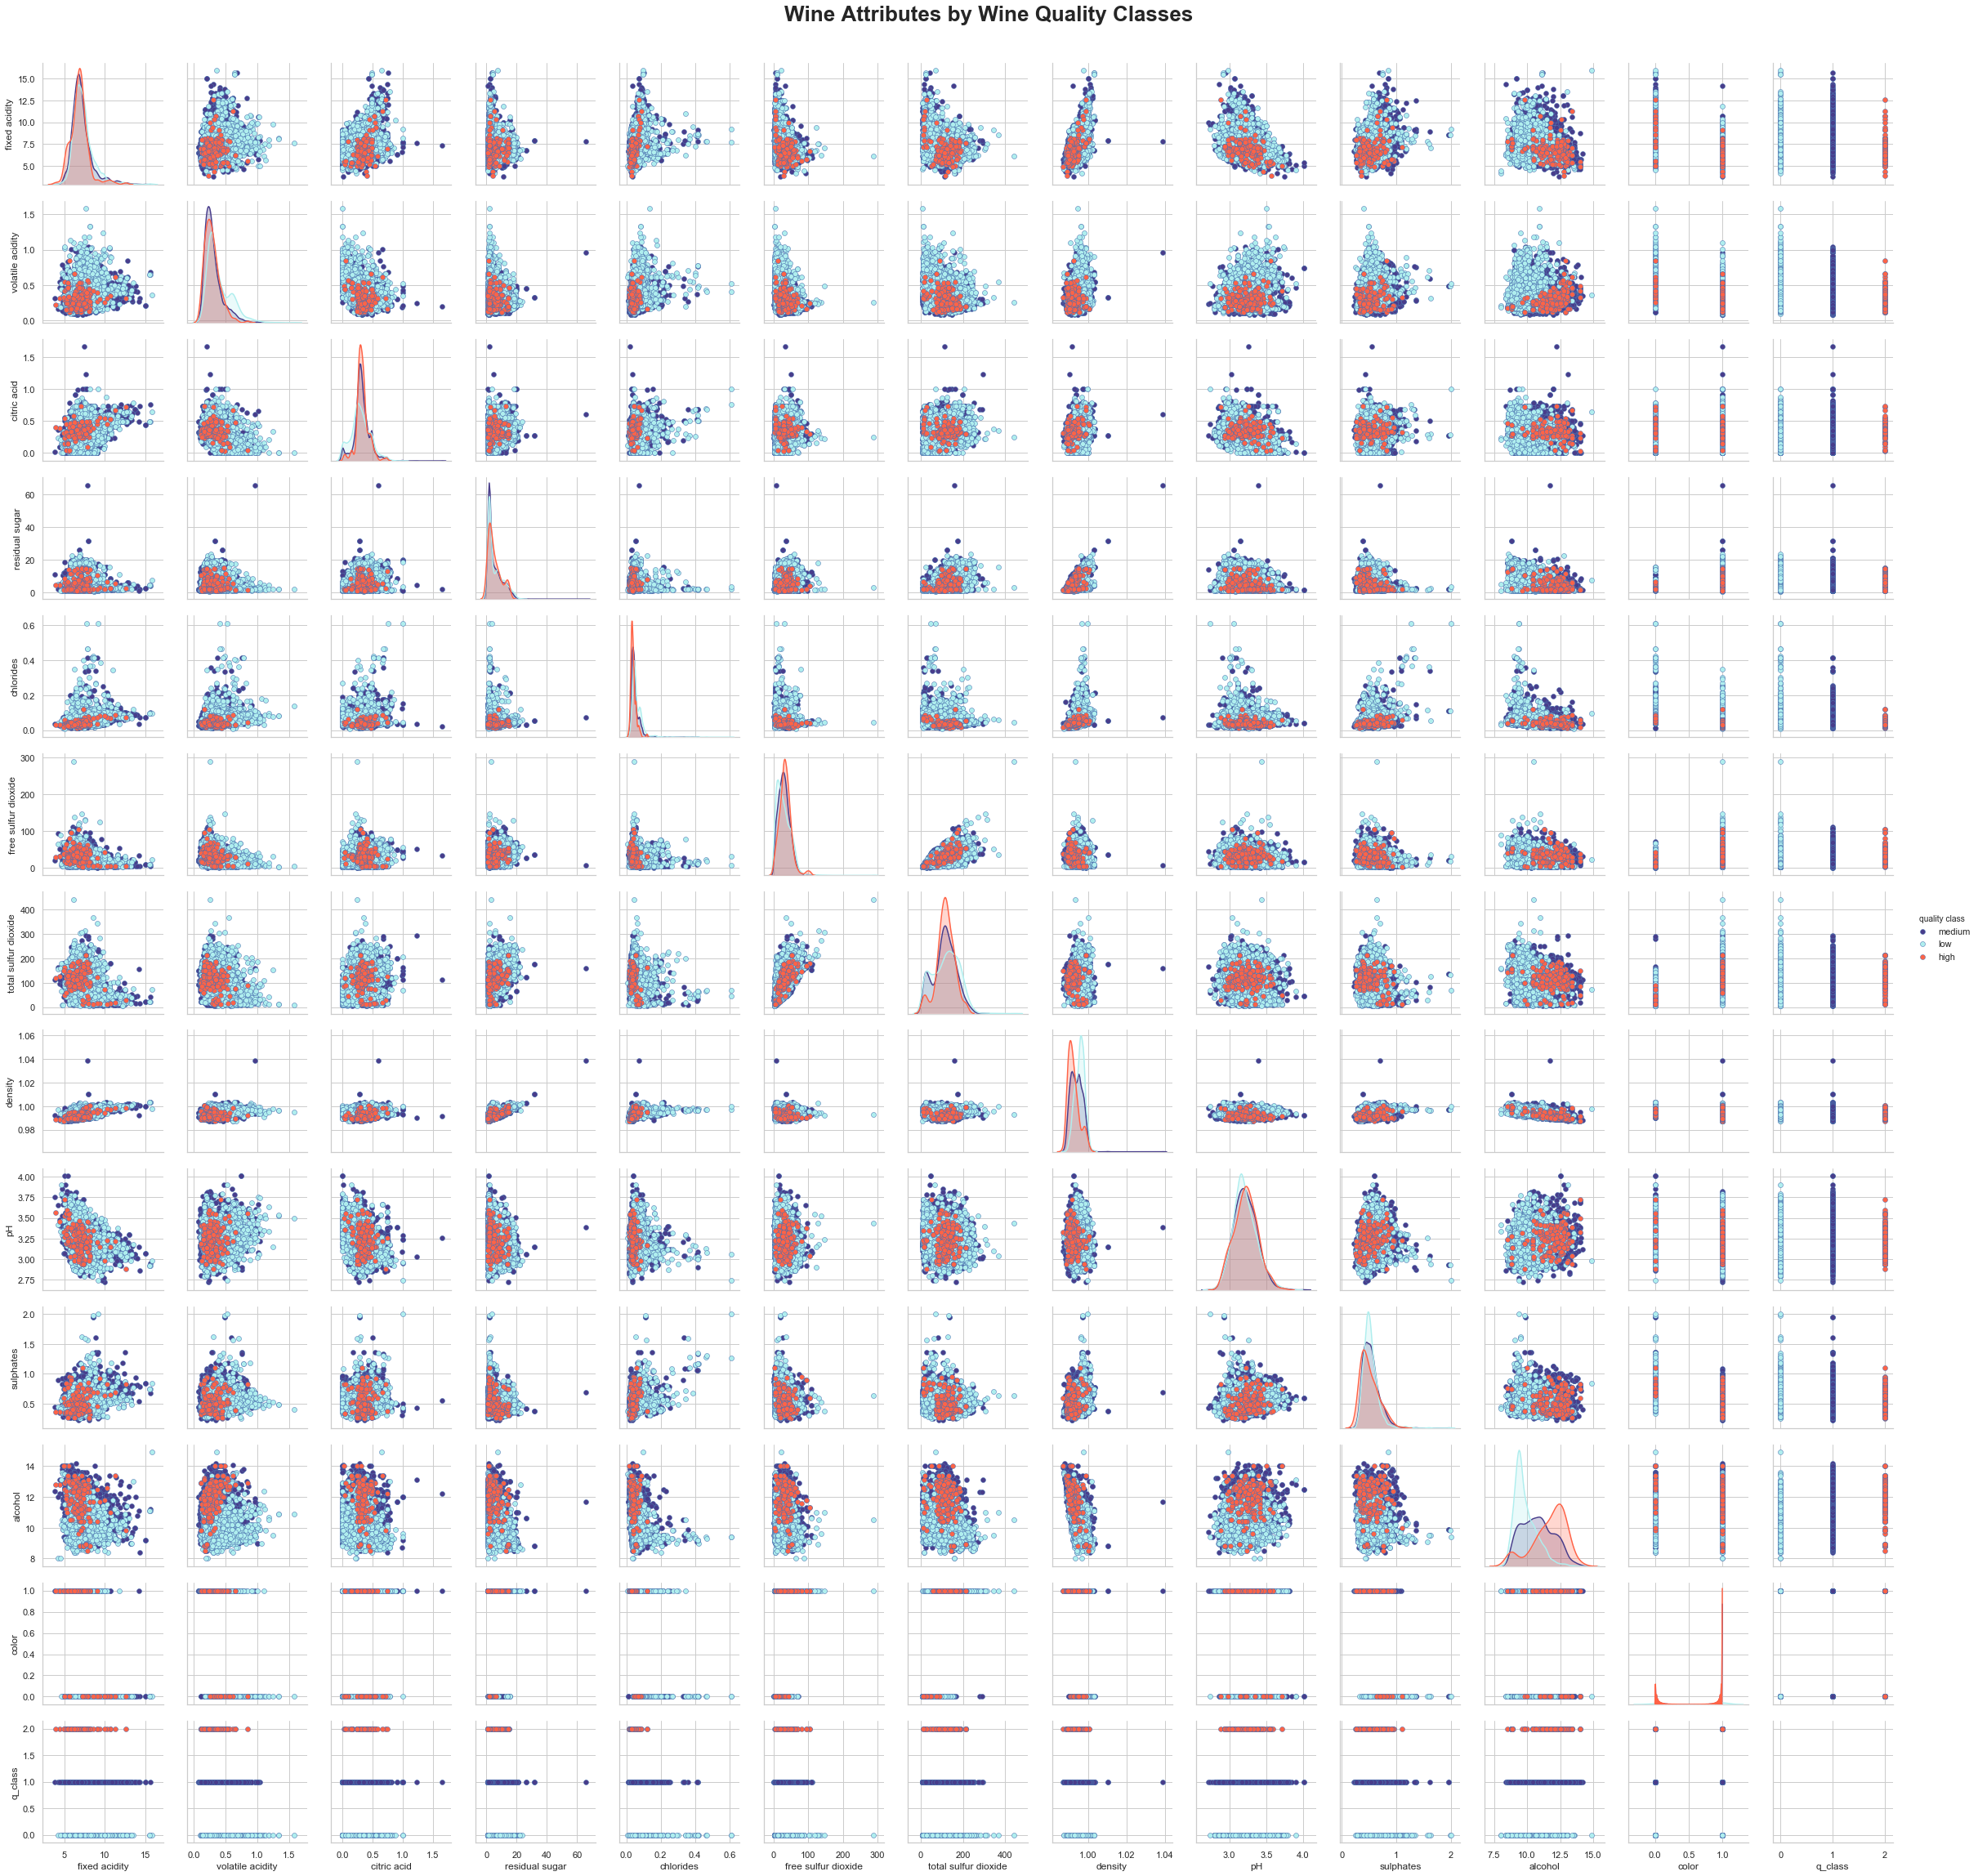

In [58]:
#Pairplot for wine attributes by wine quality classes 
g = sns.pairplot(wines_pq,
                 hue='quality class',
                 palette={'high' : 'tomato', 'medium' : 'darkslateblue', 'low' : 'paleturquoise'},
                 plot_kws=dict(edgecolor='b', linewidth=0.5))

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Wine Attributes by Wine Quality Classes',
             fontsize=26,
             fontweight='bold')

The highest sulphate levels are found in the medium quality wines, and lower with high quality wines
Lower levels of chloride and volatile acids are in wines with high quality ratings.

In [59]:
#Looking at wine quality vs all wine parameters by wine type
for f in wines.drop(['type','quality','quality class','color'],axis=1).columns:
    print(f)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


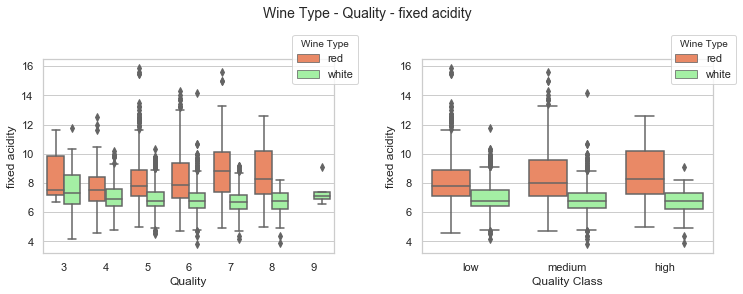

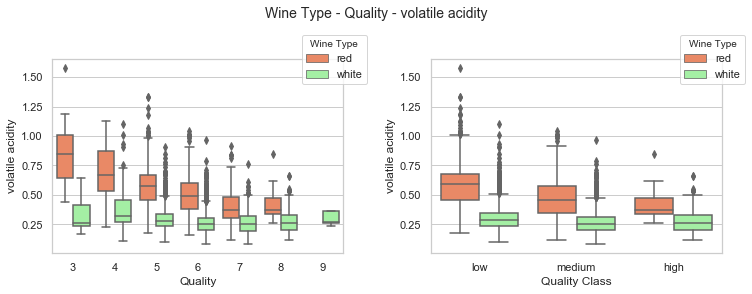

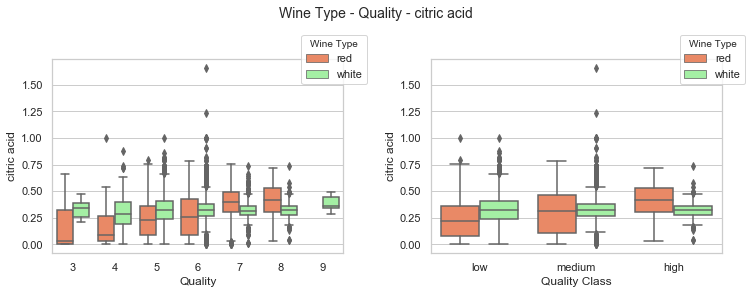

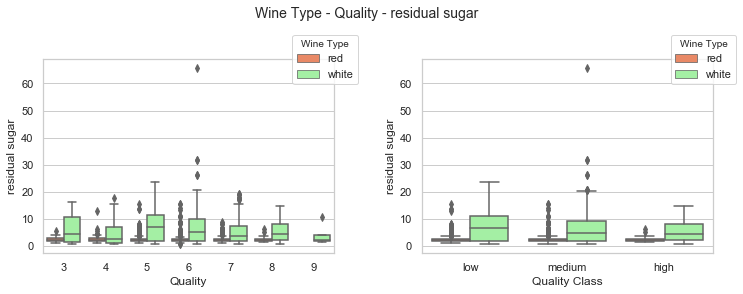

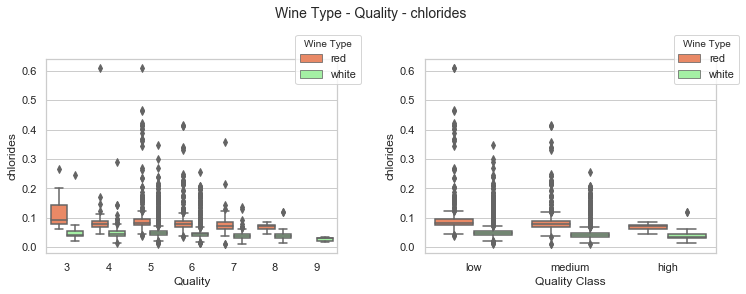

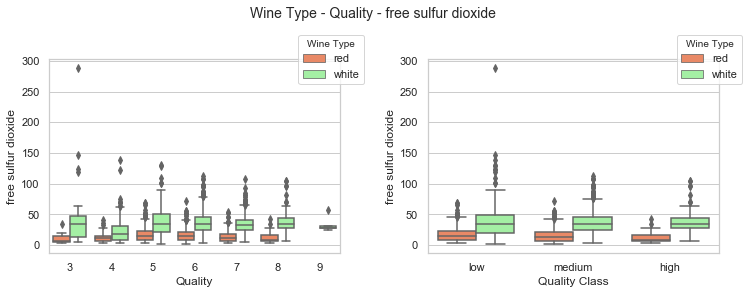

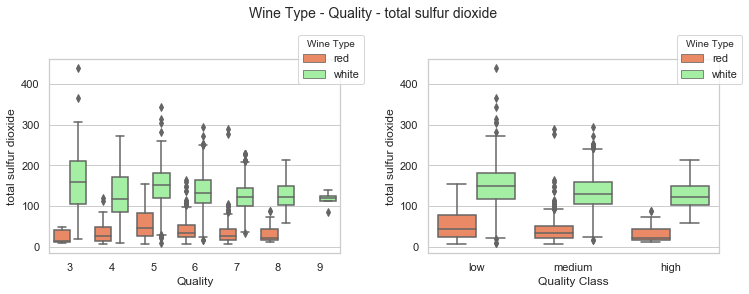

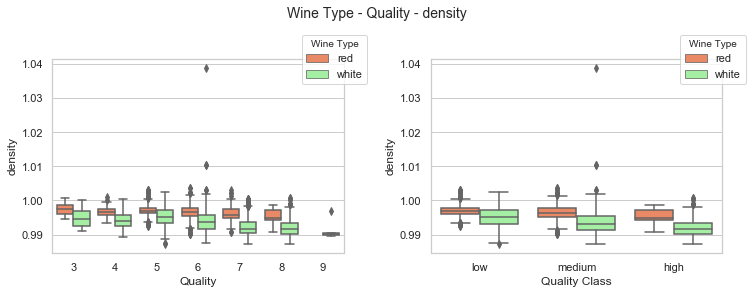

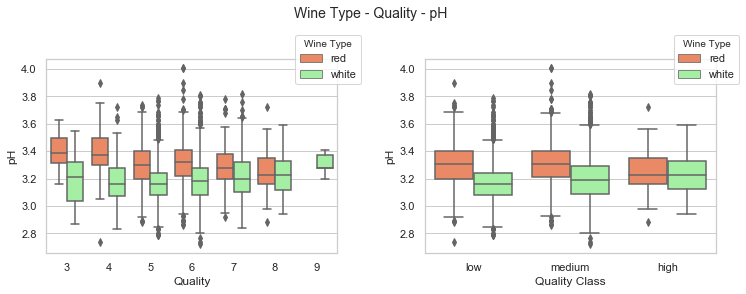

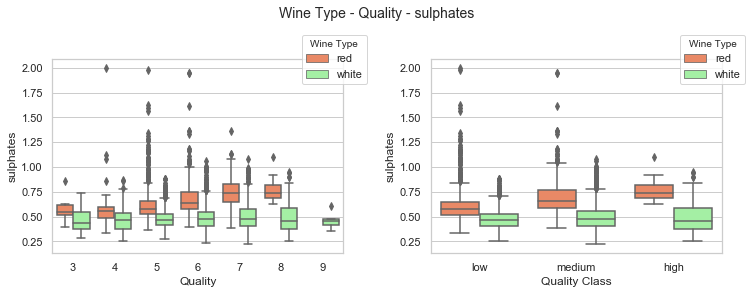

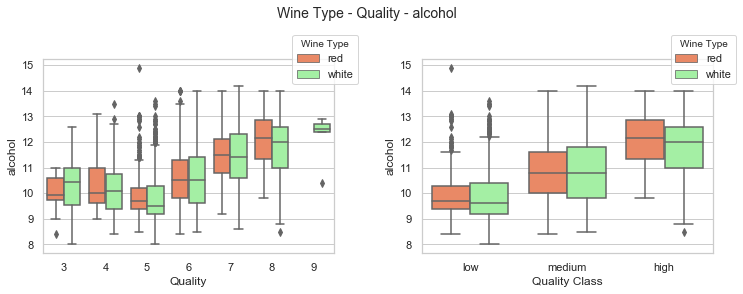

In [60]:
for attr in wines.drop(['type','quality','quality class','color'],axis=1).columns:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.suptitle('Wine Type - Quality - '+ attr, fontsize=14)
    f.subplots_adjust(top=0.80, wspace=0.3)

    sns.boxplot(x='quality',
                y=attr,
                hue='type',
                data=wines,
                palette={'red' : 'coral', 'white':'palegreen'},
                ax=ax1)
    ax1.set_xlabel('Quality')
    ax1.set_ylabel(attr,size=12)
    ax1.legend(title='Wine Type',bbox_to_anchor=(1.1,1.15))
    
    sns.boxplot(x='quality class',
                y=attr,
                hue='type',
                data=wines,
                order=['low','medium','high'],
                palette={'red' : 'coral', 'white':'palegreen'},
                ax=ax2)
    ax2.set_xlabel("Quality Class")
    ax2.set_ylabel(attr) 
    ax2.legend(loc=1,title='Wine Type',bbox_to_anchor=(1.1,1.15))

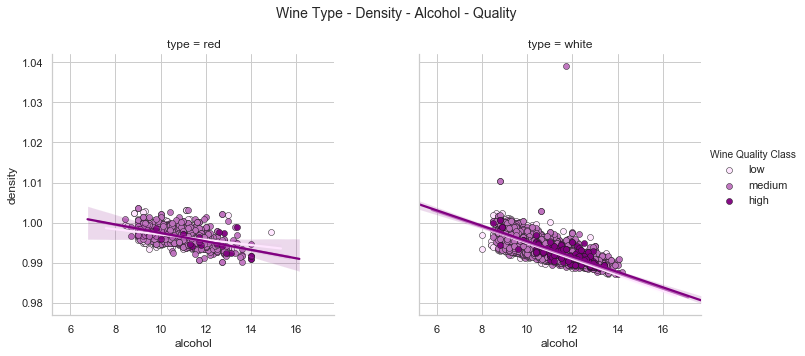

In [61]:
#Density vs. alcohol by wine type and quality classes
g = sns.lmplot(x='alcohol',
               y='density',
               col='type',
               col_order=['red','white'],
               hue='quality class',
               hue_order=['low','medium','high'],
               data=wines,
               palette=sns.light_palette('purple', 3),
               scatter_kws=dict(alpha=0.95,edgecolor="k", linewidth=0.5),
               fit_reg=True,                   
               legend=False)

fig = g.fig 
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Density - Alcohol - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')        

Key takeaways:
* Density has a negative correlation to alcohol 

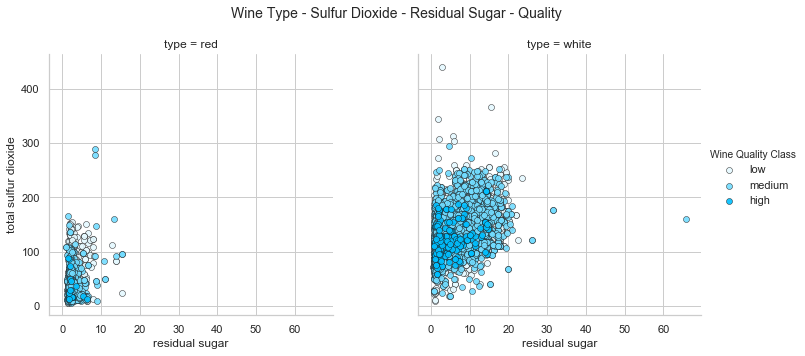

In [62]:
#Total sulfur dioxide vs. residual sugar by wine type and quality classes
g = sns.lmplot(x='residual sugar',
               y='total sulfur dioxide',
               col='type',
               col_order=['red','white'],
               hue='quality class',
               hue_order=['low','medium','high'],
               data=wines,
               palette=sns.light_palette('deepskyblue', 3),
               scatter_kws=dict(alpha=0.9,edgecolor="k", linewidth=0.5),
               fit_reg=False,
               legend=False)
fig = g.fig 
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')        

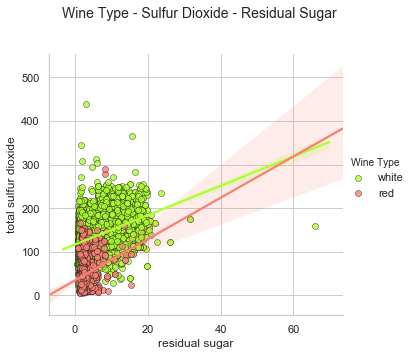

In [63]:
#Total sulfur dioxide vs. residual sugar by wine type
g = sns.lmplot(x='residual sugar',
               y='total sulfur dioxide',
               hue='type',
               hue_order=['white','red'],
               data=wines,
               palette = {'red': 'salmon', 'white':'greenyellow'},
               scatter_kws=dict(alpha=0.8,edgecolor="k", linewidth=0.5),
               fit_reg=True,
               legend=False)
fig = g.fig 
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar', fontsize=14)
g.add_legend(title='Wine Type')        

* The plot confirms previously stated results: total sulfur dioxide and residual sugar content seems to be much higher in white wines than in red wines

* The residual sugar has 0.50 corelation with total sulfur dioxide. This is an indication that more sulfur dioxide is added to wines with higher sugar

## Predicting Wine Type (Red or White)

In [64]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.56         0.22             1.8   
1  white            6.4              0.30         0.36             2.0   
2  white            5.9              0.17         0.29             3.1   
3  white            7.0              0.24         0.24             1.8   
4  white            6.4              0.45         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.074                 15.0                  24.0  0.99438  3.40   
1      0.052                 18.0                 141.0  0.99273  3.38   
2      0.030                 32.0                 123.0  0.98913  3.41   
3      0.047                 29.0                  91.0  0.99251  3.30   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol  quality quality class  color  
0       0.82     11.2        6        medium      0  
1       0.53     10.5        6        medium      1  
2       0.33     13.7        7        medium      1  
3       0.43      9.9        6        medium      1  
4       0.28     10.8        5           low      1

In [65]:
features = wines.drop(['type','quality','quality class','color'], axis=1).columns
X = wines[features].copy()

In [66]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.56         0.22             1.8      0.074   
1            6.4              0.30         0.36             2.0      0.052   
2            5.9              0.17         0.29             3.1      0.030   
3            7.0              0.24         0.24             1.8      0.047   
4            6.4              0.45         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 15.0                  24.0  0.99438  3.40       0.82   
1                 18.0                 141.0  0.99273  3.38       0.53   
2                 32.0                 123.0  0.98913  3.41       0.33   
3                 29.0                  91.0  0.99251  3.30       0.43   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  
0     11.2  
1     10.5  
2     13.7  
3      9.9  
4     10.8

In [67]:
y = wines.color.copy()

In [68]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: color, dtype: int32

In [69]:
wines.groupby('color').color.count()

color
0    1599
1    4898
Name: color, dtype: int64

In [70]:
#Split dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=77,stratify=y)

In [71]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('lr',LogisticRegression(random_state=77))
])

In [72]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'scl__copy': True, 'scl__with_mean': True, 'scl__with_std': True, 'lr__C': 1.0, 'lr__class_weight': None, 'lr__dual': False, 'lr__fit_intercept': True, 'lr__intercept_scaling': 1, 'lr__max_iter': 100, 'lr__multi_class': 'warn', 'lr__n_jobs': None, 'lr__penalty': 'l2', 'lr__random_state': 77, 'lr__so

In [73]:
# Declare parameters to tune
param_grid = {
    'lr__C': [0.1,1, 10, 100],
    'lr__tol': [0.001,0.0001]
}

In [74]:
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [75]:
# Fit and tune the model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr__C': [0.1, 1, 10, 100], 'lr__tol': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
# list the best set of parametars found by using CV
clf.best_params_

{'lr__C': 1, 'lr__tol': 0.001}

In [77]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.001, verbose=0, warm_start=False))])

In [78]:
# predict a new set of data
y_pred = clf.predict(X_test)

In [79]:
# evaluate performance of the classifier
target_names = ['red','white']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       480
       white       1.00      1.00      1.00      1470

   micro avg       0.99      0.99      0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950
 

[[ 473    7]
 [   4 1466]]


Text(341.35217391304354, 0.5, 'True Label')

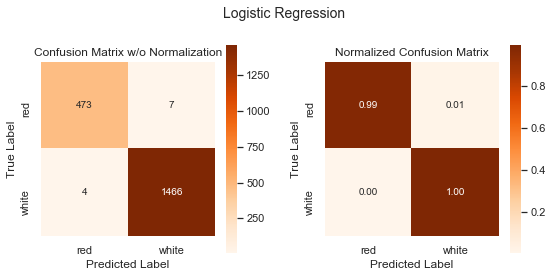

In [80]:
#Confusion matrix
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
f.suptitle('Logistic Regression', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['red','white'])
ax1.set_yticklabels(labels=['red','white'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# normalized confusion matrix 
matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['red','white'])
ax2.set_yticklabels(labels=['red','white'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

In [81]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9943589743589744

## Predicting Quality Class of Wine (low, medium, high)


In [82]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.56         0.22             1.8   
1  white            6.4              0.30         0.36             2.0   
2  white            5.9              0.17         0.29             3.1   
3  white            7.0              0.24         0.24             1.8   
4  white            6.4              0.45         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.074                 15.0                  24.0  0.99438  3.40   
1      0.052                 18.0                 141.0  0.99273  3.38   
2      0.030                 32.0                 123.0  0.98913  3.41   
3      0.047                 29.0                  91.0  0.99251  3.30   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol  quality quality class  color  
0       0.82     11.2        6        medium      0  
1       0.53     10.5        6        medium      1  
2       0.33     13.7        7        medium      1  
3       0.43      9.9        6        medium      1  
4       0.28     10.8        5           low      1

In [83]:
features = wines.drop(['type','quality','quality class','color'], axis=1).columns
X = wines[features].copy()

In [84]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.56         0.22             1.8      0.074   
1            6.4              0.30         0.36             2.0      0.052   
2            5.9              0.17         0.29             3.1      0.030   
3            7.0              0.24         0.24             1.8      0.047   
4            6.4              0.45         0.07             1.1      0.030   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 15.0                  24.0  0.99438  3.40       0.82   
1                 18.0                 141.0  0.99273  3.38       0.53   
2                 32.0                 123.0  0.98913  3.41       0.33   
3                 29.0                  91.0  0.99251  3.30       0.43   
4                 10.0                 131.0  0.99050  2.97       0.28   

   alcohol  
0     11.2  
1     10.5  
2     13.7  
3      9.9  
4     10.8

In [85]:
# earlier we prepared numerical target variable "y_class". Let's use it now
y = y_qclass

In [86]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: quality class, dtype: int64

In [87]:
y.value_counts()

1    3915
0    2384
2     198
Name: quality class, dtype: int64

### Decision Tree

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=77,stratify=y)

In [89]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('dtree',DecisionTreeClassifier(random_state=77))
])

In [90]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'dtree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'), 'scl__copy': True, 'scl__with_mean': True, 'scl__with_std': True, 'dtree__class_weight': None, 'dtree__criterion': 'gini',

In [91]:
# Declare parameters to tune
param_grid = {
    'dtree__min_samples_leaf': [2, 3, 4, 6],
    'dtree__max_depth': [8, 9, 10, 12, 13],
    'dtree__criterion': ['gini','entropy'],
    'dtree__class_weight': ['balanced', None]
}

In [92]:
#Cross validation with pipeline
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [93]:
# Fit and tune the model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'dtree__min_samples_leaf': [2, 3, 4, 6], 'dtree__max_depth': [8, 9, 10, 12, 13], 'dtree__criterion': ['gini', 'entropy'], 'dtree__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
# list the best set of parametars found by using CV
clf.best_params_

{'dtree__class_weight': None,
 'dtree__criterion': 'gini',
 'dtree__max_depth': 12,
 'dtree__min_samples_leaf': 2}

In [95]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'))])

In [96]:
#Predictions
y_pred = clf.predict(X_test)

In [97]:
# evaluate performance of the classifier
target_names = ['low','medium','high']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         low       0.68      0.69      0.69       716
      medium       0.78      0.80      0.79      1175
        high       0.59      0.17      0.26        59

   micro avg       0.74      0.74      0.74      1950
   macro avg       0.68      0.55      0.58      1950
weighted avg       0.74      0.74      0.74      1950
 

[[495 221   0]
 [228 940   7]
 [  3  46  10]]


In [98]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

0.7410256410256411

Mediocore results. From the class based statistics we can see that the recall for high quality wines is pretty bad. A lot of them have been misplaced into low and medium ratings.
This was expected since there are not a lot of training samples for high quality wines.

Text(487.0739130434785, 0.5, 'True Label')

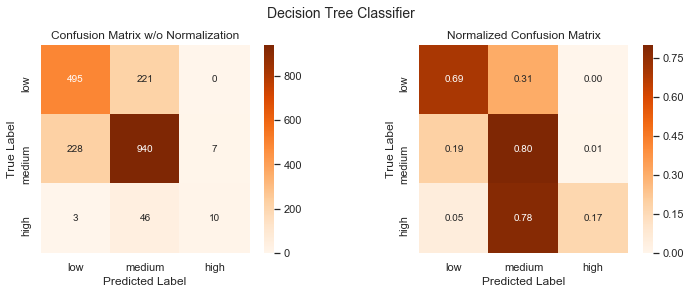

In [99]:
#Confusion matrix
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Decision Tree Classifier', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['low','medium','high'])
ax1.set_yticklabels(labels=['low','medium','high'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# normalized confusion matrix 
matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['low','medium','high'])
ax2.set_yticklabels(labels=['low','medium','high'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

* The diagonal elements in the confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

* The higher the diagonal values of the confusion matrix the better, indicating many correct predictions

* Due to heavy class imbalance, we had to perform normalization by class support size to have a more visual interpretation of which class is being misclassified.

* In our case it is obvious that lack of high quality wine samples caused their misplacement mostly into medium class.

### Random Forest

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=77,stratify=y)

In [101]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('rfc',RandomForestClassifier(random_state=77))
])

In [102]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=77, verbose=0, warm_start=False))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'rfc': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=77, verbose=0, warm_start=Fa

In [ ]:
# Declare parameters to tune
param_grid = {
   # 'rfc__min_samples_leaf': [1, 2, 3],
    'rfc__min_samples_split': [2, 3, 4],
    'rfc__n_estimators': [150, 175, 200 ],
    'rfc__max_depth': [20, 40, None],
    'rfc__criterion': ['gini','entropy'],
    'rfc__class_weight': ['balanced', None]
}

In [ ]:
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [ ]:
# Fit and tune the model
clf.fit(X_train,y_train)

In [ ]:
# list the best set of parametars found by using CV
clf.best_params_

In [ ]:
clf.best_estimator_

In [ ]:
#Predictions
y_pred = clf.predict(X_test)

In [ ]:
# # evaluate performance of the classifier
target_names = ['low','medium','high']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

In [ ]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Random Forest Classifier', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['low','medium','high'])
ax1.set_yticklabels(labels=['low','medium','high'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['low','medium','high'])
ax2.set_yticklabels(labels=['low','medium','high'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')